# 第二章作业

两类模式具有正态概率密度函数

ω1 {(0,0),(2,0),(2,2),(0,2)}

ω2 {(4,4),(6,4),(6,6),(4,6)}

P(ω1) = P(ω2) = 1/2
1. 求这两类模式之间的贝叶斯判别界面的方程式
2. 绘出判别界面

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def get_n_m_c_c_inv(test):
    # 维度k
    k = np.size(test, 0)
    # 样本数目n
    n = np.size(test, 1)
    # 均值m
    m = np.mean(test, axis=1, keepdims=True)
    # 中间变量tmp
    tmp = test - m
    # 协方差矩阵c
    c = np.zeros([k, k])
    for i in range(n):
        test_i = tmp[:, i].reshape([k, 1])
        c = c + test_i * test_i.T
    c = c/n
    # 协方差矩阵转置c_inv
    c_mat = np.mat(c)
    c_inv = np.linalg.inv(c_mat)
    return m, c, c_inv

In [9]:
# for test
# test1 = [[1, 0, 1], [1, 0, 0], [0, 0, 0], [1, 1, 0]]
# test1 = np.array(test1)
# test1 = test1.T

# test2 = [[0, 0, 1], [0, 1, 1], [0, 1, 0], [1, 1, 1]]
# test2 = np.array(test2)
# test2 = test2.T

# m_1, c_1, c_inv_1 = get_n_m_c_c_inv(test1)
# m_2, c_2, c_inv_2 = get_n_m_c_c_inv(test2)

# print(m_1)
# print(m_2)
# print(c_1)
# print(c_2)

In [10]:
w1 = [[0, 0], [2, 0], [2, 2], [0, 2]]
w2 = [[4, 4], [6, 4], [6, 6], [4, 6]]
w1 = np.array(w1)
w2 = np.array(w2)
w1 = w1.T
w2 = w2.T

m_1, c_1, c_inv_1 = get_n_m_c_c_inv(w1)
m_2, c_2, c_inv_2 = get_n_m_c_c_inv(w2)

print(m_1)
print(m_2)
print(c_1)
print(c_2)

[[1.]
 [1.]]
[[5.]
 [5.]]
[[1. 0.]
 [0. 1.]]
[[1. 0.]
 [0. 1.]]


协方差矩阵 c_1 = c_2
因为 P(ω1) = P(ω2)
所以判别界面方程中 ln(P(ω1)) - ln(P(ω2)) = 0

In [11]:
# 求解判别界面方程
# x前系数
m_tmp = m_1 - m_2
m_tmp = m_tmp.T
x_p = m_tmp * c_inv_1
print(x_p)

# 常数参数
b = 1/2 * m_2.T * c_inv_2 * m_2 - 1/2 * m_1.T * c_inv_1 * m_1
print(b)

[[-4. -4.]]
[[24.]]


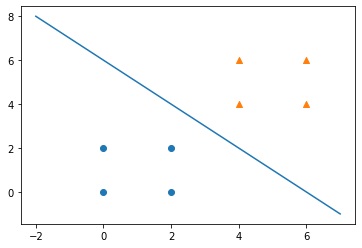

In [12]:
# 作图
# - 4x1 - 4x2 + 24 = 0
# x2 = -x1 + 6
x1 = np.arange(-2, 8)
x2 = -x1 + 6
# 绘制直线
plt.plot(x1, x2)
# 绘制样本点
w1_x1 = w1[0]
w1_x2 = w1[1]
w2_x1 = w2[0]
w2_x2 = w2[1]
plt.scatter(w1_x1, w1_x2, marker='o')
plt.scatter(w2_x1, w2_x2, marker='^')
# 展示
plt.show()
